<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/Adaptive%20Supertrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install pandas_ta
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import pandas_ta as ta
import pandas_datareader as pdr

In [46]:
df = pdr.get_data_yahoo("NVDA","2012-01-01","2013-01-01")

In [472]:
raw = df.copy()
raw['ADX'] = ta.adx(raw.High, raw.Low, raw.Close)['ADX_14']
raw['DMP'] = ta.adx(raw.High, raw.Low, raw.Close)['DMP_14']
raw['DMN'] = ta.adx(raw.High, raw.Low, raw.Close)['DMN_14']

In [473]:
# raw['DMP'] = ta.adx(df.High, df.Low, df.Close, 14)['DMP_14']
# raw['DMN'] = ta.adx(df.High,df.Low, df.Close, 14)['DMN_14']
w = []
for i in range(len(df)):
  t = raw[:i+1]
  
  if (t['ADX'].values[i]>0) and (t['ADX'].values[i]<=20):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7, 3.0)['SUPERT_7_3.0'].values[-1])
  elif (t['ADX'].values[i]>20 and (t['ADX'].values[i]<=40)):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7,2.0)['SUPERT_7_2.0'].values[-1])
  elif (t['ADX'].values[i]>40 and (t['ADX'].values[i]<=50)):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7,1.75)['SUPERT_7_1.75'].values[-1])  
  elif (t['ADX'].values[i]>50) and (t['ADX'].values[i]<=100):
    w.append(ta.supertrend(t.High, t.Low, t.Close, 7,1.0)['SUPERT_7_1.0'].values[-1])
  # elif (t['ADX'].values[i]>75) and (t['ADX'].values[i]<=100):
  #   w.append(ta.supertrend(t.high, t.low, t.close, 14, 1.0)['SUPERT_14_1.0'].values[-1])


In [474]:
data = df.iloc[1:].copy()
data['Supertrend'] = w

In [475]:
e = ta.vp(data.Close, data.Volume)

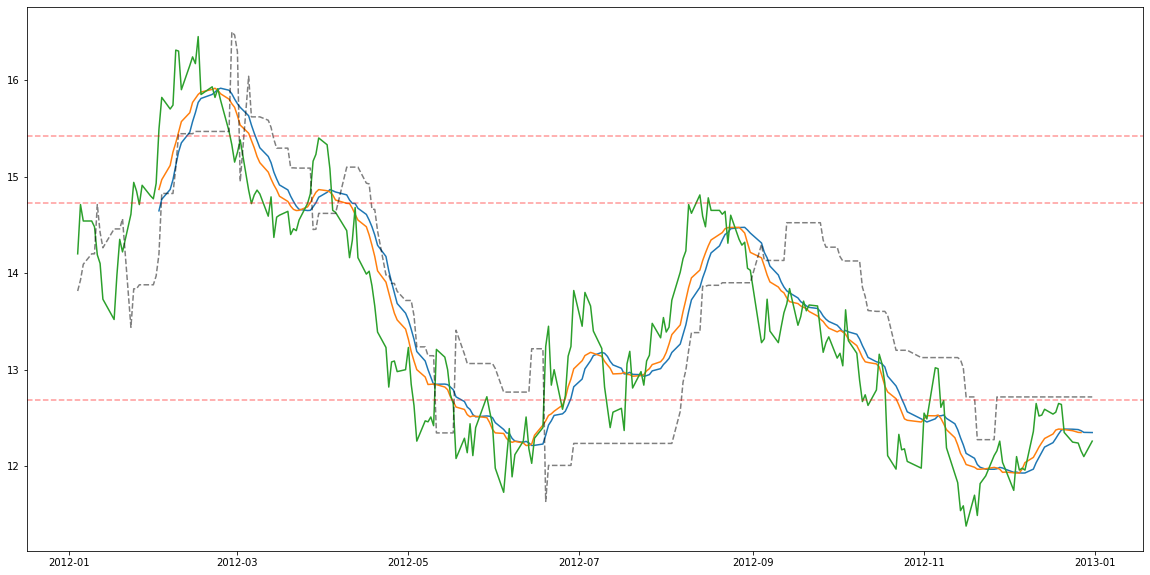

In [476]:
fig,ax = plt.subplots(1, figsize = (20,10), sharex = True)
ax.plot(ta.wma(data.Close,21))
ax.plot(ta.wma(data.Close.shift(-2),21))
ax.plot(data['Close'])
ax.plot(data['Supertrend'],color = 'black',alpha= 0.5, linestyle = "--")
ax.axhline(e.sort_values(by= ['total_Volume','mean_Close'])['mean_Close'].values[-1],color = "red", alpha = 0.4, linestyle = "--")
ax.axhline(e.sort_values(by= ['total_Volume','mean_Close'])['mean_Close'].values[-2],color = "red", alpha = 0.4, linestyle = "--")
ax.axhline(e.sort_values(by= ['total_Volume','mean_Close'])['mean_Close'].values[-3],color = "red", alpha = 0.4, linestyle = "--")
# ax[1].plot(ta.stoch(data.High, data.Low,data.Close,14))
# ax[1].axhline(50)
# ta.wma(df.close,21).plot(figsize = (20,5))
# ta.wma(df.close.shift(-2), 21).plot()
# df.close.plot()